In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [10]:
weather_data = pd.read_csv("C:/Users/Manikanta Rajulapati/OneDrive/Desktop/Univariant/dataset/weather_forecast.csv")

In [11]:
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [12]:
weather_data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [13]:
weather_data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [14]:
weather_data['datetime_utc'] = pd.to_datetime(weather_data['datetime_utc'])

In [15]:
weather_data.set_index('datetime_utc',inplace = True)
weather_data

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5


In [16]:
weather_data=weather_data.resample('D').mean()

In [17]:
weather_data

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,NaN,52.916667,NaN,-2659.666667,0.0,0.0,22.333333,0.0,0.0,2.250000,23.333333,NaN,NaN,2.466667
1996-11-02,10.458333,0.0,0.0,NaN,48.625000,NaN,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.476190,106.666667,NaN,NaN,8.028571
1996-11-03,12.041667,0.0,0.0,26.80,55.958333,NaN,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.286364,106.666667,NaN,NaN,4.804545
1996-11-04,10.222222,0.0,0.0,27.50,48.055556,NaN,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.326667,55.555556,NaN,NaN,1.964706
1996-11-05,8.200000,0.0,0.0,NaN,29.400000,NaN,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,NaN,NaN,10.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-20,16.750000,0.0,0.0,NaN,27.500000,NaN,998.625000,0.0,0.0,34.500000,0.0,0.0,2.500000,216.666667,NaN,NaN,5.562500
2017-04-21,21.500000,0.0,0.0,NaN,39.375000,NaN,999.875000,0.0,0.0,34.250000,0.0,0.0,2.000000,92.500000,NaN,NaN,6.962500
2017-04-22,20.400000,0.0,0.0,38.05,40.900000,NaN,1001.600000,0.0,0.0,32.900000,0.2,0.0,1.950000,113.750000,NaN,NaN,8.890000


In [19]:
weather_data = weather_data[[' _tempm']]

In [20]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _tempm  7336 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB


In [21]:
weather_data.isnull().any()

 _tempm    True
dtype: bool

In [22]:
weather_data.reset_index(inplace = True)

In [23]:
weather_data.rename(columns = {'datetime_utc':'ds',' _tempm':'y'},inplace = True)

C:\Users\Manikanta Rajulapati\AppData\Local\Temp\ipykernel_19464\871640858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data.rename(columns = {'datetime_utc':'ds',' _tempm':'y'},inplace = True)


In [24]:
weather_data.head()

,ds,y
0,1996-11-01,22.333333
1,1996-11-02,22.916667
2,1996-11-03,21.791667
3,1996-11-04,22.722222
4,1996-11-05,27.800000


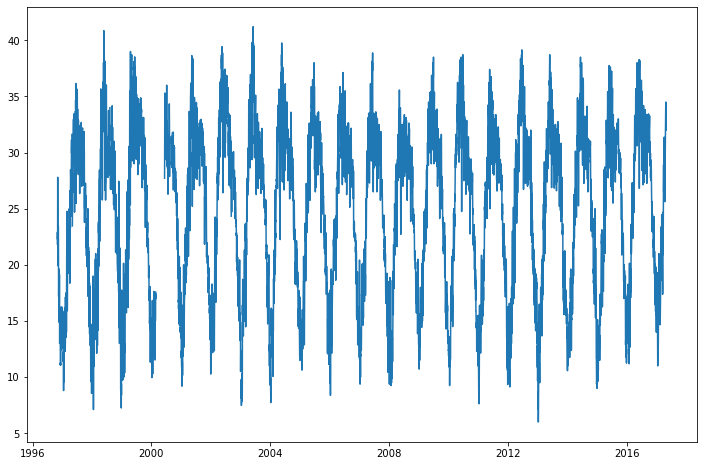

In [25]:
plt.figure(figsize=(12,8))
plt.plot(weather_data.set_index(["ds"]))

In [26]:
model = Prophet()
model.fit(weather_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [27]:
future = model.make_future_dataframe(periods=365,freq="D")
future.tail()

,ds
7840,2018-04-20
7841,2018-04-21
7842,2018-04-22
7843,2018-04-23
7844,2018-04-24


In [28]:
forecast = model.predict(future)
forecast.head()

C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-11-01,23.463320,18.099662,23.838194,23.463320,23.463320,-2.311569,-2.311569,-2.311569,-0.055606,-0.055606,-0.055606,-2.255963,-2.255963,-2.255963,0.0,0.0,0.0,21.151751
1,1996-11-02,23.465488,18.003210,23.910056,23.465488,23.465488,-2.430374,-2.430374,-2.430374,-0.003909,-0.003909,-0.003909,-2.426466,-2.426466,-2.426466,0.0,0.0,0.0,21.035114
2,1996-11-03,23.467657,17.933970,23.617935,23.467657,23.467657,-2.634057,-2.634057,-2.634057,-0.035809,-0.035809,-0.035809,-2.598248,-2.598248,-2.598248,0.0,0.0,0.0,20.833600
3,1996-11-04,23.469826,17.649045,23.579575,23.469826,23.469826,-2.777865,-2.777865,-2.777865,-0.005997,-0.005997,-0.005997,-2.771869,-2.771869,-2.771869,0.0,0.0,0.0,20.691960
4,1996-11-05,23.471995,17.752303,23.431369,23.471995,23.471995,-2.966083,-2.966083,-2.966083,-0.018278,-0.018278,-0.018278,-2.947805,-2.947805,-2.947805,0.0,0.0,0.0,20.505912


In [29]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7840,2018-04-20,32.890616,29.988793,35.719861
7841,2018-04-21,33.100295,30.173879,36.156990
7842,2018-04-22,33.224761,30.195888,35.970511
7843,2018-04-23,33.409297,30.454244,36.183906
7844,2018-04-24,33.549980,30.680661,36.524733


In [30]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1996-11-01,21.151751,18.099662,23.838194
1,1996-11-02,21.035114,18.003210,23.910056
2,1996-11-03,20.833600,17.933970,23.617935
3,1996-11-04,20.691960,17.649045,23.579575
4,1996-11-05,20.505912,17.752303,23.431369


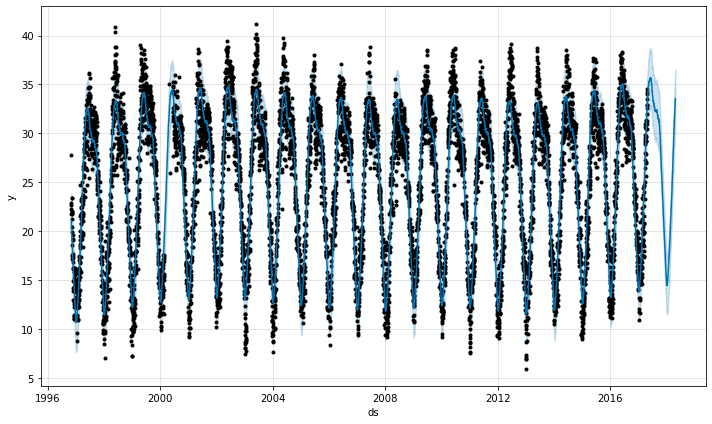

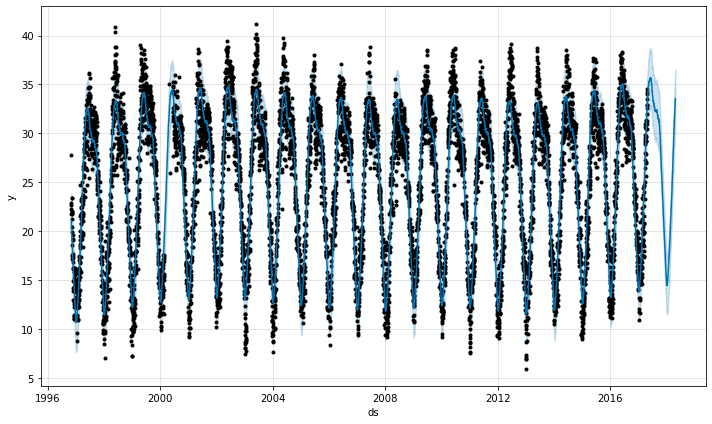

In [31]:
model.plot(forecast)

C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


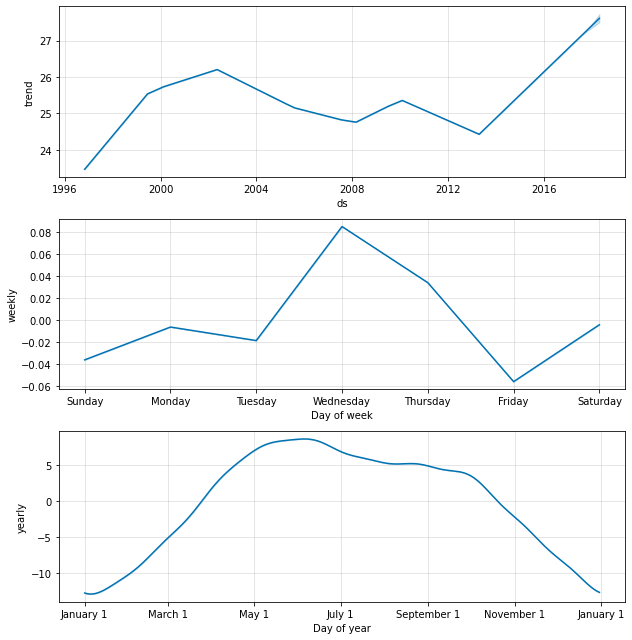

In [32]:
fig = model.plot_components(forecast)

In [33]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='730 days',period = '180 days',horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 36 forecasts with cutoffs between 1999-01-24 00:00:00 and 2016-04-24 00:00:00
  0%|          | 0/36 [00:00<?, ?it/s]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  3%|▎         | 1/36 [00:06<03:31,  6.03s/it]

 28%|██▊       | 10/36 [01:19<04:06,  9.49s/it]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 31%|███       | 11/36 [01:31<04:21, 10.44s/it]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py

 56%|█████▌    | 20/36 [04:37<05:36, 21.01s/it]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 58%|█████▊    | 21/36 [04:58<05:15, 21.01s/it]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py

 83%|████████▎ | 30/36 [07:57<02:09, 21.51s/it]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 86%|████████▌ | 31/36 [08:26<01:58, 23.62s/it]C:\Users\Manikanta Rajulapati\anaconda3\envs\zaf\lib\site-packages\fbprophet\forecaster.py

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1999-01-25,13.588897,10.692505,16.477951,13.20,1999-01-24
1,1999-01-26,13.768008,10.688653,16.751646,10.00,1999-01-24
2,1999-01-27,13.994103,10.957615,17.110917,17.75,1999-01-24
3,1999-01-28,13.987919,11.110988,16.816067,11.75,1999-01-24
4,1999-01-29,13.792033,10.673722,16.687238,11.20,1999-01-24


In [34]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,6.364319,2.522760,1.992789,0.098333,0.072821,0.774241
1,38 days,6.416841,2.533148,2.002437,0.098608,0.072821,0.773602
2,39 days,6.495739,2.548674,2.016379,0.098910,0.073417,0.769324
3,40 days,6.530697,2.555523,2.020017,0.098824,0.074176,0.769151
4,41 days,6.600465,2.569137,2.026209,0.098541,0.074772,0.767943


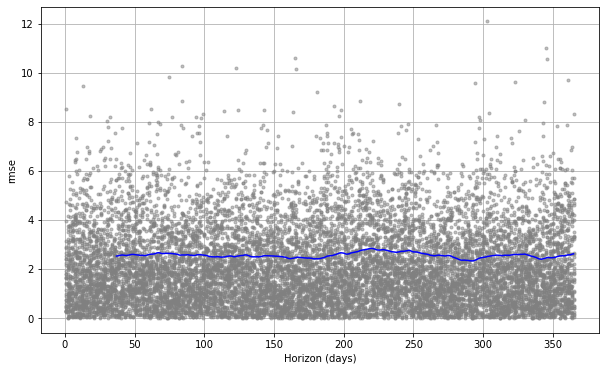

In [35]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric="rmse")

In [36]:
import pickle 
pickle.dump(model,open("weather_prediction.pickle","wb"))